# Importing all Necessary libraries

In [5]:
# For data access
import pandas as pd

# For splitting data
import numpy as np
from sklearn.model_selection import train_test_split

# Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier as knn

# Using SVM classifier
from sklearn.svm import SVC as sve

# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Using KNN Imputer
from sklearn.impute import KNNImputer

# Using cross_value for cross-validation
from sklearn.model_selection import cross_val_score

# Using KFold cross-validation
from sklearn.model_selection import KFold as kf

# Using StratifiedKFold and GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Using accuracy score
from sklearn.metrics import accuracy_score

# Using confusion matrix
from sklearn.metrics import confusion_matrix

# Using Standard Scaler
from sklearn.preprocessing import StandardScaler

# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


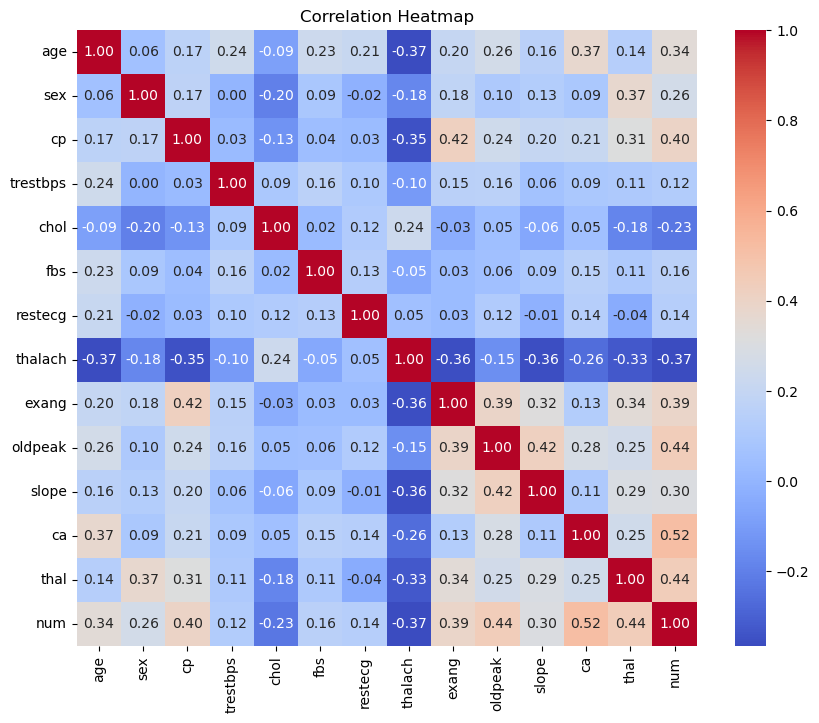

In [6]:
# Reading the CSV file into a DataFrame
a = pd.read_csv('sathvi dataset.csv')

# Replacing '?' with NA (null values)
a.replace('?', pd.NA, inplace=True)

# Converting specific columns to numeric data types
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = a.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Random Forest Classfier using mean Imputation

In [32]:
# Reading the CSV file into a DataFrame
a = pd.read_csv('sathvi dataset.csv')

# Replacing '?' with NA (null values)
a.replace('?', pd.NA, inplace=True)

# Displaying the count of missing values
print("Count of NUll Values for each Attribute:\n")
print(a.isnull().sum())

# Converting specific columns to numeric data types
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Converting 'num' column to binary (0 or 1)
a['num'] = np.where(a['num'] > 0, 1, 0)

# Filling missing values with group-wise means
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform('mean'), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform('mean'), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform('mean'), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform('mean'), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform('mean'), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform('mean'), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform('mean'), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform('mean'), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform('mean'), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform('mean'), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform('mean'), inplace=True)
a['chol'].fillna(a['chol'].mean(), inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform('mean'), inplace=True)
a['thalach'].fillna(a['thalach'].mean(), inplace=True)


# Displaying the count of missing values after filling
print("The count of missing values after Applying Mean Imputation:\n")
print(a.isnull().sum())
print("\n")

a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])


# Separating features and target variable
X = a.drop("num", axis=1)
y = a.num

# Displaying the count of target variable classes
print("Count Of Target Variable Classes:\n",y.value_counts())

# Scaling the features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


Count of NUll Values for each Attribute:

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
The count of missing values after Applying Mean Imputation:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


Count Of Target Variable Classes:
 1    509
0    411
Name: num, dtype: int64


### Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define StratifiedKFold cross-validation with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define a dictionary of hyperparameters for RandomizedSearchCV
random_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8], 
    'criterion': ['entropy']
}

# Create a base RandomForestClassifier
rf = RandomForestClassifier()

# Perform RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=400, cv=skf, verbose=1, n_jobs=-1)
rf_randomcv.fit(X, y)

# Print the best hyperparameters from RandomizedSearchCV
print(rf_randomcv.best_params_)

# Define a parameter grid for GridSearchCV using the best parameters from RandomizedSearchCV
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200,
                     rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100,
                     rf_randomcv.best_params_['n_estimators'] + 200],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Print the best parameters and best score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)


Fitting 7 folds for each of 400 candidates, totalling 2800 fits


In [27]:
# Define the parameter grid
param_grid = {
    'criterion': 'entropy',
    'max_depth': 1000,
    'max_features': 'log2',
    'min_samples_leaf': 8,
    'min_samples_split': 2,
    'n_estimators': 300,
    'random_state': 533
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a RandomForestClassifier with the provided parameters
    random_forest = RandomForestClassifier(**param_grid)

    # Train the model
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred = random_forest.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy
    })

    # Print results for this split
    print(f"Split {split_num} :\n Train Size: {len(X_train)}, Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy*100, 3))
    print("--------------------------------******------------------------------")

# Calculate average test accuracy across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])

# Print average test accuracy
print("Average Accuracy for 7 Folds:", round(avg_test_accuracy*100,3))


Split 1 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[59  0]
 [ 4 69]]
 Test Accuracy: 96.97
--------------------------------******------------------------------
Split 2 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 4 69]]
 Test Accuracy: 93.182
--------------------------------******------------------------------
Split 3 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[53  6]
 [ 4 69]]
 Test Accuracy: 92.424
--------------------------------******------------------------------
Split 4 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[56  2]
 [ 5 68]]
 Test Accuracy: 94.656
--------------------------------******------------------------------
Split 5 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[53  5]
 [ 6 67]]
 Test Accuracy: 91.603
--------------------------------******------------------------------
Split 6 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[54  5]
 [ 2 70]]
 Test Accuracy: 94.656
--------------------------

# RandomForest Classifier using mode Imputation

In [22]:
# Load the dataset
a = pd.read_csv('sathvi dataset.csv')

# Replace '?' with NaN
a.replace('?', np.NAN, inplace=True)

# Convert selected columns to numeric
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Convert 'num' column to binary labels (0 or 1)
a['num'] = np.where(a['num'] > 0, 1, 0)

# Fill missing values using mode for certain columns
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform(lambda x: x.mode()[0]), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform(lambda x: x.mode()[0]), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform(lambda x: x.mode()[0]), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform(lambda x: x.mode()[0]), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform(lambda x: x.mode()[0]), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform(lambda x: x.mode()[0]), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform(lambda x: x.mode()[0]), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform(lambda x: x.mode()[0]), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform(lambda x: x.mode()[0]), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform(lambda x: x.mode()[0]), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform(lambda x: x.mode()[0]), inplace=True)
a['chol'].fillna(a['chol'].mode()[0], inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0), inplace=True)
a['thalach'].fillna(a['thalach'].mode()[0], inplace=True)

# Check for remaining missing values
print(a.isnull().sum())

# Perform one-hot encoding
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Prepare features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num


# Scaling the features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [33]:
# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define a dictionary of hyperparameter values for RandomizedSearchCV
random_grid = {
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
     'min_samples_split': [2, 5, 10, 14],
     'min_samples_leaf': [1, 2, 4, 6, 8], 
     'criterion': ['entropy', 'gini'],
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV with the defined parameters
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=skf, verbose=1, n_jobs=-1)

# Fit the randomized model
rf_randomcv.fit(X, y)

# Print the best parameters and best score found by RandomizedSearchCV
print("Best Parameters:", rf_randomcv.best_params_)
print("Best Score:", rf_randomcv.best_score_ * 100)

# Define a parameter grid based on the best parameters from RandomizedSearchCV
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

# Initialize a new RandomForestClassifier
rf = RandomForestClassifier()

# Initialize GridSearchCV with the defined parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)

# Fit the grid_search to the data
grid_search.fit(X, y)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)


Fitting 7 folds for each of 100 candidates, totalling 700 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 230, 'criterion': 'gini'}
Best Score: 92.49776940616636
Fitting 7 folds for each of 75 candidates, totalling 525 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 230, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 600}
Best Score: 92.38954429794124


In [24]:
# Define the parameter grid
param_grid = {
              'criterion': 'gini',
              'max_depth': 230, 
              'max_features': 'log2',
              'min_samples_leaf': 2,
              'min_samples_split': 4,
              'n_estimators': 600
             }

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a RandomForestClassifier with the provided parameters
    random_forest = RandomForestClassifier(**param_grid)

    # Train the model
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred = random_forest.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy
    })

    # Print results for this split
    print(f"Split {split_num} :\n Train Size: {len(X_train)}, Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy*100, 3))
    print("--------------------------------******------------------------------")

# Calculate average test accuracy across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])

# Print average test accuracy
print("Average Accuracy for 7 Folds:", round(avg_test_accuracy*100,3))


Split 1 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[56  3]
 [ 4 69]]
 Test Accuracy: 94.697
--------------------------------******------------------------------
Split 2 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[53  6]
 [ 4 69]]
 Test Accuracy: 92.424
--------------------------------******------------------------------
Split 3 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 5 68]]
 Test Accuracy: 92.424
--------------------------------******------------------------------
Split 4 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[51  7]
 [ 6 67]]
 Test Accuracy: 90.076
--------------------------------******------------------------------
Split 5 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[52  6]
 [ 3 70]]
 Test Accuracy: 93.13
--------------------------------******------------------------------
Split 6 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[51  8]
 [ 7 65]]
 Test Accuracy: 88.55
---------------------------

# RandomForest Classifier using median Imputation

In [36]:
# Load the dataset
a = pd.read_csv('sathvi dataset.csv')
a.replace('?', d.NA, inplace=True)

# Convert columns to numeric, handle missing values, and create binary 'num' column
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

a['num'] = np.where(a['num'] > 0, 1, 0)

# Fill missing values using median imputation
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform('median'), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform('median'), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform('median'), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform('median'), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform('median'), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform('median'), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform('median'), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform('median'), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform('median'), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform('median'), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform('median'), inplace=True)
a['chol'].fillna(a['chol'].median(), inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform('median'), inplace=True)
a['thalach'].fillna(a['thalach'].median(), inplace=True)
print(a.isnull().sum())

# One-hot encode categorical columns
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Separate features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num

# Standardize features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the random grid of hyperparameters
random_grid = {
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
     'min_samples_split': [2, 5, 10, 14],
     'min_samples_leaf': [1, 2, 4, 6, 8], 
     'criterion': ['entropy', 'gini'],
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Perform randomized search using RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=skf, verbose=1, n_jobs=-1)
rf_randomcv.fit(X_scaled, y)

# Print the best parameters and best score from random search
print("Best Parameters (Random Search):", rf_randomcv.best_params_)
print("Best Score (Random Search):", rf_randomcv.best_score_ * 100)

# Define a more focused param grid based on random search results
param_grid = {
     'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200,
                     rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100,
                     rf_randomcv.best_params_['n_estimators'] + 200]
}

# Perform grid search using GridSearchCV
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

# Print the best parameters and best score from grid search
print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Score (Grid Search):", grid_search.best_score_ * 100)


Fitting 7 folds for each of 100 candidates, totalling 700 fits
Best Parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 780, 'criterion': 'entropy'}
Best Score: 93.47923069297114
Fitting 7 folds for each of 75 candidates, totalling 525 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 780, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1000}
Best Score: 93.69568090942137


In [28]:
# Define the parameter grid
param_grid = {'criterion': 'entropy', 'max_depth': 780, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1000}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a RandomForestClassifier with the provided parameters
    random_forest = RandomForestClassifier(**param_grid)

    # Train the model
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred = random_forest.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy
    })

    # Print results for this split
    print(f"Split {split_num} :\n Train Size: {len(X_train)}, Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy*100, 3))
    print("--------------------------------******------------------------------")

# Calculate average test accuracy across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])

# Print average test accuracy
print("Average Accuracy for 7 Folds:", round(avg_test_accuracy*100,3))


Split 1 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[59  0]
 [ 4 69]]
 Test Accuracy: 96.97
--------------------------------******------------------------------
Split 2 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[52  7]
 [ 4 69]]
 Test Accuracy: 91.667
--------------------------------******------------------------------
Split 3 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 5 68]]
 Test Accuracy: 92.424
--------------------------------******------------------------------
Split 4 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[53  5]
 [ 4 69]]
 Test Accuracy: 93.13
--------------------------------******------------------------------
Split 5 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[52  6]
 [ 5 68]]
 Test Accuracy: 91.603
--------------------------------******------------------------------
Split 6 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[54  5]
 [ 5 67]]
 Test Accuracy: 92.366
---------------------------

# RandomForest Classifier using KNNI Imputer

In [29]:
# Read the dataset
a = pd.read_csv('sathvi dataset.csv')

# Replace '?' with NaN
a.replace('?', pd.NA, inplace=True)

# Convert selected columns to numeric, handling errors as NaN
numeric_columns = ['age', 'restecg', 'oldpeak', 'fbs', 'chol', 'thalach', 'trestbps', 'exang', 'thal', 'slope', 'ca']
a[numeric_columns] = a[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Initialize KNNImputer for imputing missing values
knn_imputer = KNNImputer(n_neighbors=6)

# Convert target variable to binary
a['num'] = np.where(a['num'] > 0, 1, 0)

# Columns to impute using KNNImputer
columns_to_impute = ['restecg', 'exang', 'slope', 'thal', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

# Impute missing values using KNNImputer
a[columns_to_impute] = knn_imputer.fit_transform(a[columns_to_impute])

# Convert fbs values to binary
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)

# Check for remaining missing values
print(a.isnull().sum())

# One-hot encode categorical columns
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Store column names
c = a.columns

# Separate features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num

# Display class distribution
print(y.value_counts())

# Standardize features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
1    509
0    411
Name: num, dtype: int64


In [39]:
# Define the hyperparameter grid for RandomizedSearchCV
random_grid = {
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
     'min_samples_split': [2, 5, 10, 14],
     'min_samples_leaf': [1, 2, 4, 6, 8], 
     'criterion': ['entropy', 'gini']
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV for hyperparameter tuning
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                 n_iter=100, cv=skf, verbose=1, n_jobs=-1)

# Fit the randomized model
rf_randomcv.fit(X_scaled, y)

# Print the best parameters and best score
print("Best Parameters:", rf_randomcv.best_params_)
print("Best Score:", rf_randomcv.best_score_ * 100)

# Define the hyperparameter grid for GridSearchCV using best parameters from RandomizedSearchCV
param_grid = {
     'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200],
}

# Create a new RandomForestClassifier instance
rf = RandomForestClassifier()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=1)

# Fit the grid_search to the data
grid_search.fit(X_scaled, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)


Fitting 7 folds for each of 100 candidates, totalling 700 fits
Best Parameters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 890, 'criterion': 'entropy'}
Best Score: 93.58745580119626
Fitting 7 folds for each of 75 candidates, totalling 525 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 890, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1800}
Best Score: 93.69733320115


In [30]:
# Define the parameter grid
param_grid = {
              'criterion': 'entropy', 
              'max_depth': 780, 
              'max_features': 'auto',
              'min_samples_leaf': 1,
              'min_samples_split': 6,
              'n_estimators': 1000
             }

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a RandomForestClassifier with the provided parameters
    random_forest = RandomForestClassifier(**param_grid)

    # Train the model
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred = random_forest.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy
    })

    # Print results for this split
    print(f"Split {split_num} :\n Train Size: {len(X_train)}, Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy*100, 3))
    print("--------------------------------******------------------------------")

# Calculate average test accuracy across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])

# Print average test accuracy
print("Average Accuracy for 7 Folds:", round(avg_test_accuracy*100,3))


Split 1 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[54  5]
 [10 63]]
 Test Accuracy: 88.636
--------------------------------******------------------------------
Split 2 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[47 12]
 [10 63]]
 Test Accuracy: 83.333
--------------------------------******------------------------------
Split 3 :
 Train Size: 788, Test Size: 132
 Confusion Matrix:
 [[46 13]
 [10 63]]
 Test Accuracy: 82.576
--------------------------------******------------------------------
Split 4 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[47 11]
 [ 7 66]]
 Test Accuracy: 86.26
--------------------------------******------------------------------
Split 5 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[39 19]
 [ 8 65]]
 Test Accuracy: 79.389
--------------------------------******------------------------------
Split 6 :
 Train Size: 789, Test Size: 131
 Confusion Matrix:
 [[46 13]
 [10 62]]
 Test Accuracy: 82.443
--------------------------